In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from functools import partial

# OpenCV

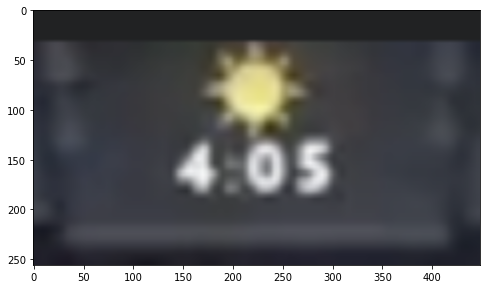

In [15]:
# numpy ndarray
# img = cv2.imread('../../video-samples/4-05.png', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('../../video-samples/4-05.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pipeline = [
    partial(cv2.resize, dsize=None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
]
for transform in pipeline:
    img = transform(src=img)

# do not use cv2.imshow()
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='Greys_r')
plt.show()

# EasyOCR

[([[165, 0], [509, 0], [509, 129], [165, 129]], '3814', 0.34567897756748517)]


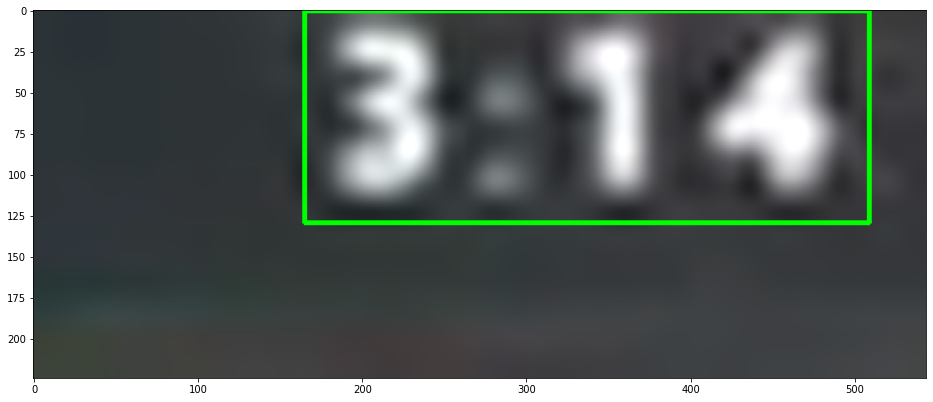

In [62]:
import easyocr

image = cv2.imread('../../video-samples/ukbICbM4RR0__033.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
bbox = (16, 30, 619, 653)
image = image[bbox[0]:bbox[1], bbox[2]:bbox[3]]
image = cv2.resize(image, dsize=None, fx=16, fy=16, interpolation=cv2.INTER_CUBIC)

reader = easyocr.Reader(['en'])
result = reader.readtext(image)
print(result)

for (bbox, text, prob) in result: 
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image)

# TrOCR

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
# inference
model_version = "microsoft/trocr-base-printed"
processor = TrOCRProcessor.from_pretrained(model_version)
model = VisionEncoderDecoderModel.from_pretrained(model_version)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
img1 = cv2.imread('../../video-samples/4-05.png')
img1 = cv2.resize(img1, dsize=(384, 384))

img2 = cv2.imread('../../video-samples/3-14.png')
img2 = cv2.resize(img2, dsize=(384, 384))

In [64]:
pixel_values = processor(img2, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_text

'3.14'

# Main Part

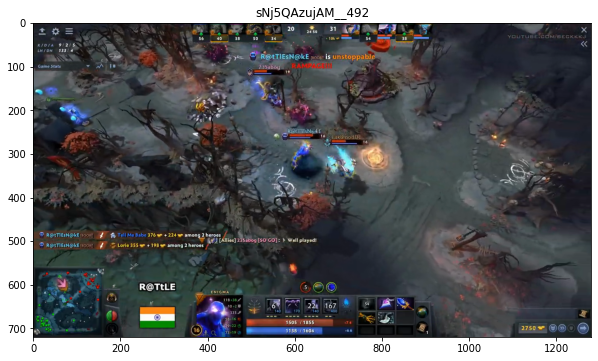

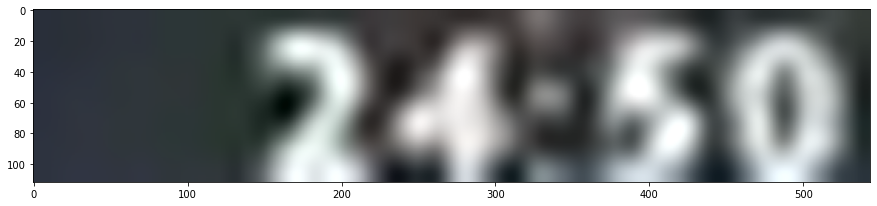

Recognized: 24.50 File: sNj5QAzujAM__492.bmp


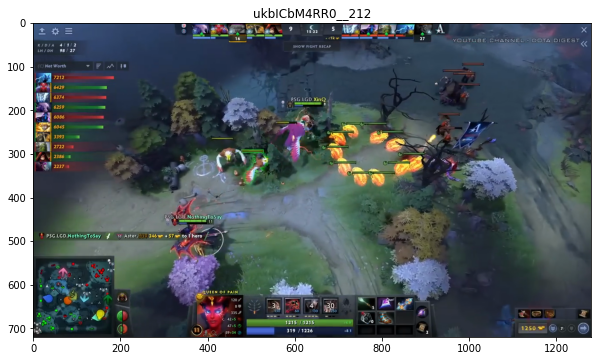

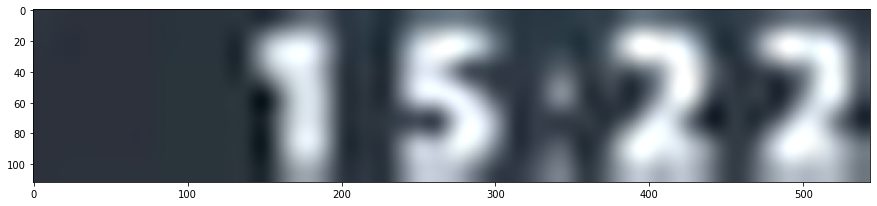

Recognized: 1522 File: ukbICbM4RR0__212.bmp


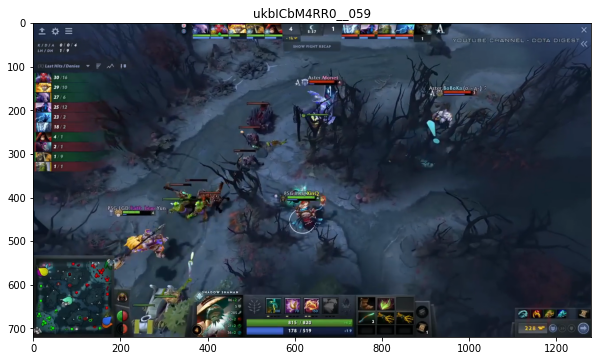

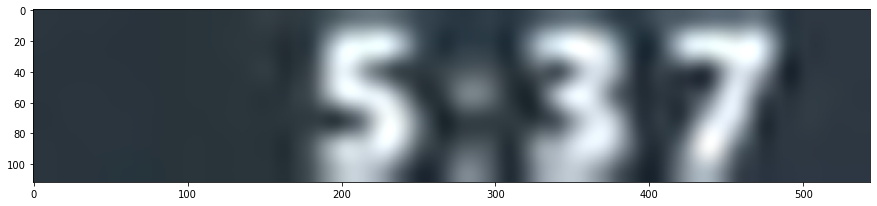

Recognized: 537 File: ukbICbM4RR0__059.bmp


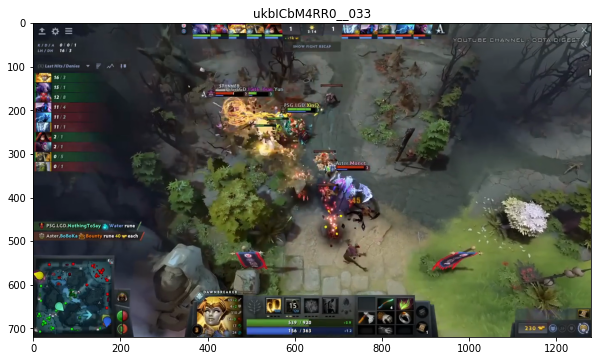

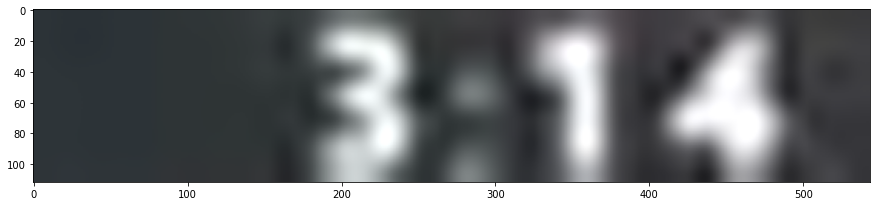

Recognized: 3.14 File: ukbICbM4RR0__033.bmp


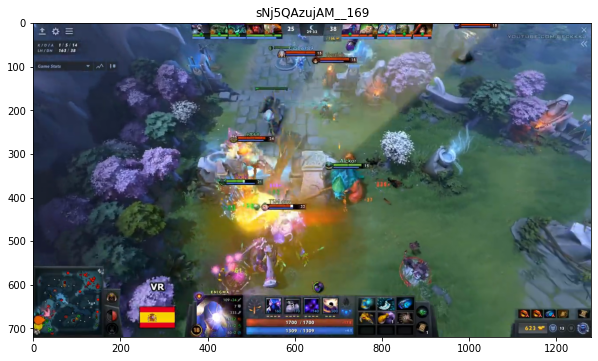

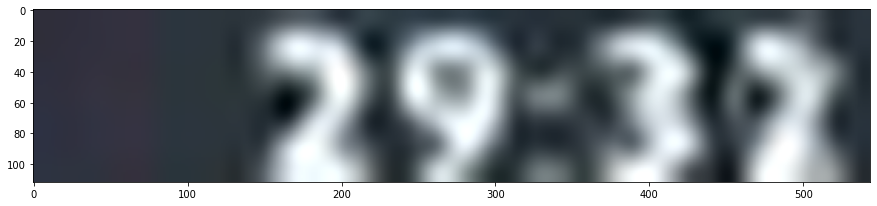

Recognized: 29.32 File: sNj5QAzujAM__169.bmp


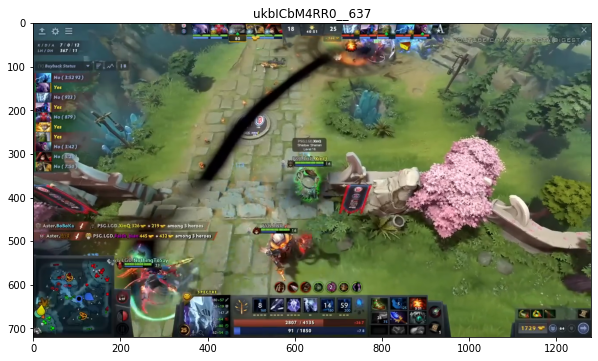

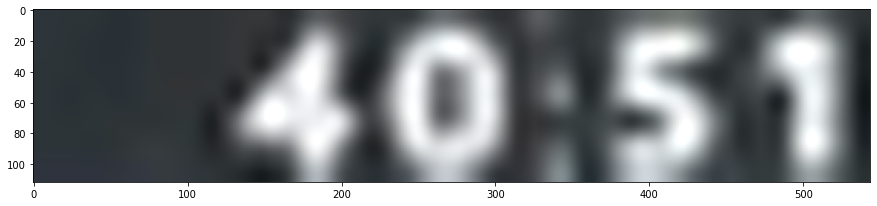

Recognized: 40.51 File: ukbICbM4RR0__637.bmp


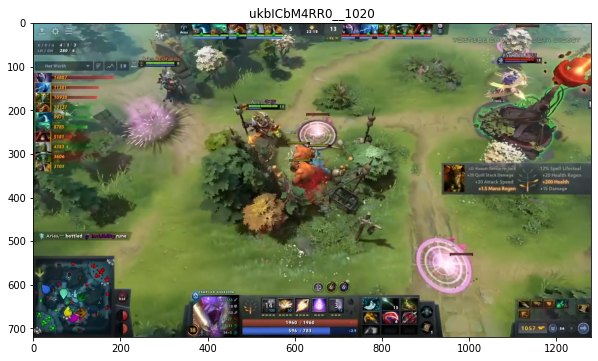

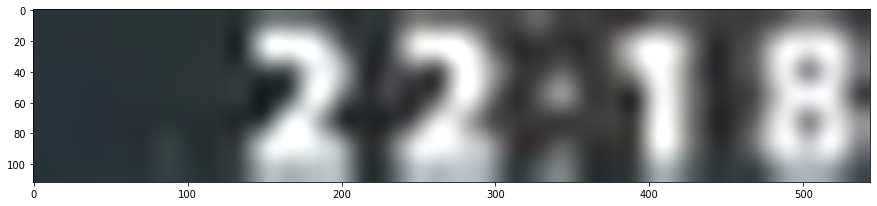

Recognized: 2218 File: ukbICbM4RR0__1020.bmp


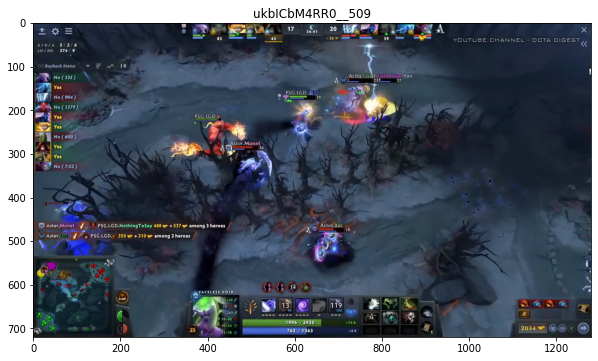

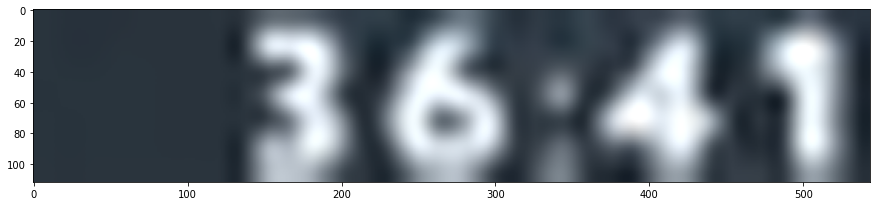

Recognized: 36.41 File: ukbICbM4RR0__509.bmp


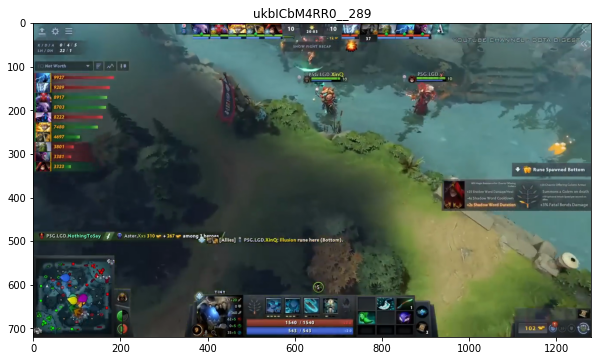

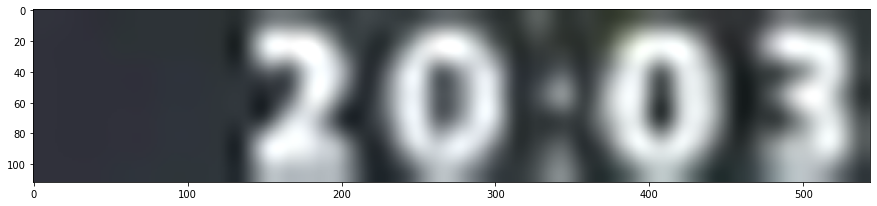

Recognized: 20.03 File: ukbICbM4RR0__289.bmp


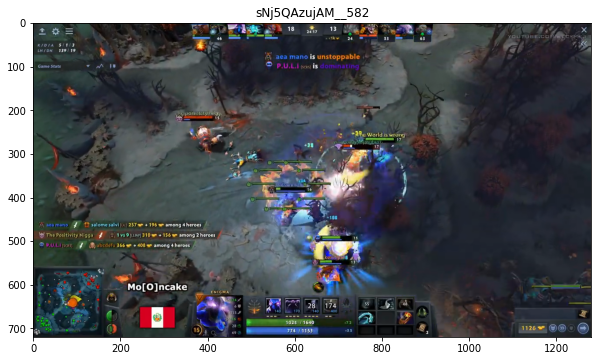

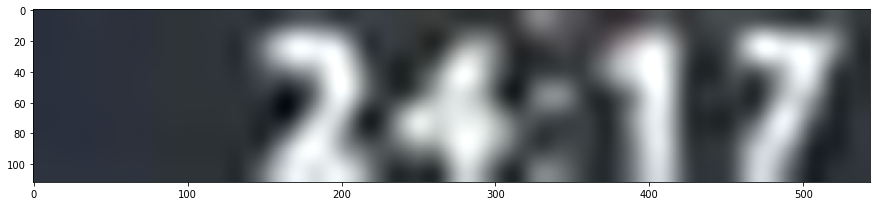

Recognized: 2417 File: sNj5QAzujAM__582.bmp


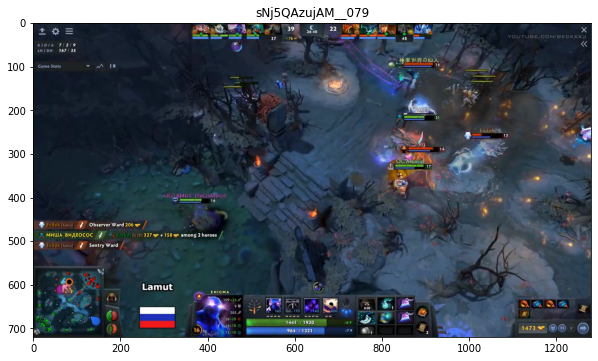

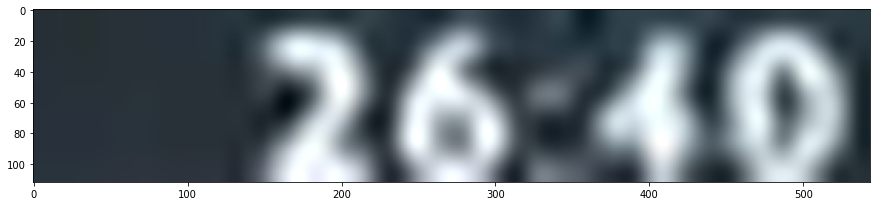

Recognized: 26.40 File: sNj5QAzujAM__079.bmp


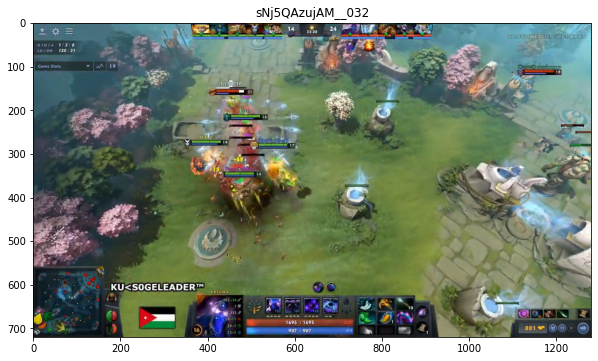

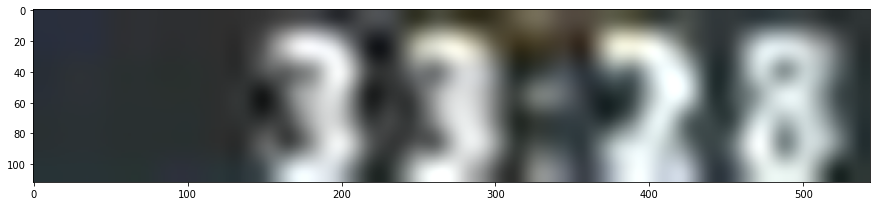

Recognized: 33.28 File: sNj5QAzujAM__032.bmp


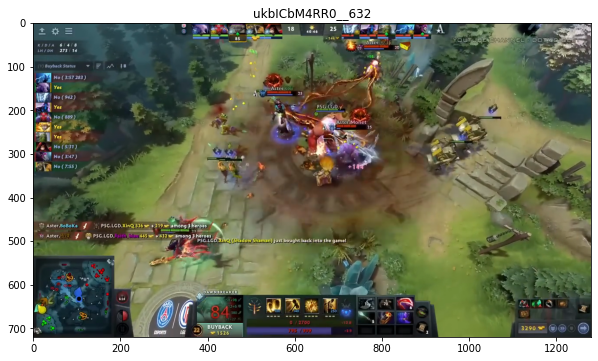

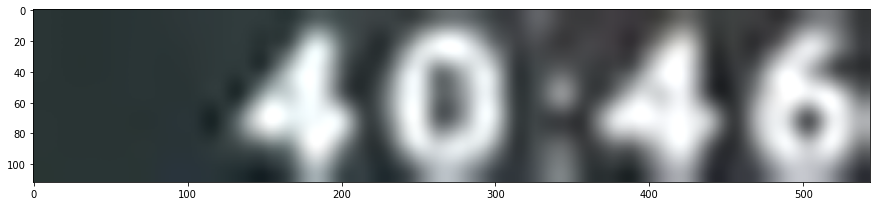

Recognized: 40.46 File: ukbICbM4RR0__632.bmp


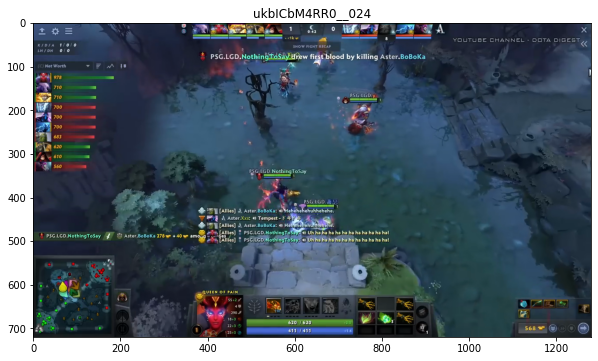

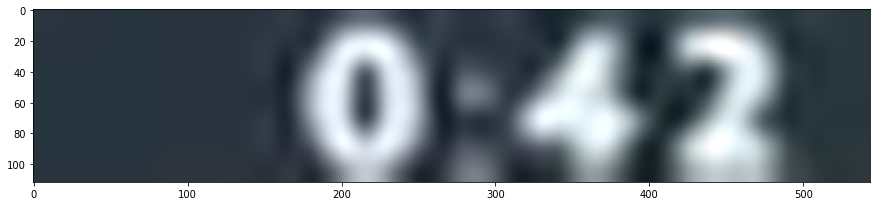

Recognized: 0.42 File: ukbICbM4RR0__024.bmp


In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from functools import partial

import logging, sys
logging.disable(sys.maxsize)

FRAMES_DIR = Path('../youtube/frames/')
sample_size = 14
samples = np.random.choice(os.listdir(FRAMES_DIR), sample_size)
# samples = sorted(samples)

for i, file in enumerate(samples):
    if file == '.DS_Store':
        continue
    
    path = FRAMES_DIR / file
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = file.replace('.bmp', '')
    
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(label)
    plt.show()
    
    # CROP
    # img = img[16:23, 629:651]
    img = img[16:23, 619:653]
    pipeline = [
        partial(cv2.resize, dsize=None, fx=16, fy=16, interpolation=cv2.INTER_CUBIC)
    ]
    for transform in pipeline:
        img = transform(src=img)
        
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(img)
    plt.show()
    
    # OCR
    image = Image.fromarray(img)
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # print(''.join([c for c in generated_text if c.isdigit()]) == label.replace('-', ''))
    print('Recognized:', generated_text, 'File:', file)
    if i > sample_size:
        break